In [40]:
library(readr)
library(knitr)
library(dplyr)
library(ggplot2)

In [41]:
articles <- read_csv(
  "/Users/ombelinemussat/Documents/TCD/thesis/data/articles_with_lexicoder_sentiment.csv"
)

Rows: 2532 Columns: 11
── Column specification ───────────────────────────────────────────────────────
Delimiter: ","
chr  (4): article_url, article_text, cleaned_text, month
dbl  (5): num_comments, year, negativity, article_length, negativity_percent
date (2): article_date_created, article_date_updated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
str(articles)

spc_tbl_ [2,532 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ article_url         : chr [1:2532] "https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/" "https://www.thejournal.ie/rishi-sunak-northern-ireland-protocol-deal-imminent-5997518-Feb2023/" "https://www.thejournal.ie/migration-uk-eu-after-brexit-5561000-Oct2021/" "https://www.thejournal.ie/irish-exports-highest-level-ever-5683731-Feb2022/" ...
 $ article_text        : chr [1:2532] "THE GOVERNMENT IS to seek an “early warning system” on the use of Article 16 of the Northern Ireland protocol o"| __truncated__ "LAST UPDATE|16 Feb 2023\nBRITISH PRIME MINISTER Rishi Sunak has travelled to the North ahead of talks with Stor"| __truncated__ "IT’S NOW OVER five years since the UK voted to leave the European Union, a result partly driven by concerns ove"| __truncated__ "THE VALUE OF goods exported from Ireland rose to its highest level ever last year, powered by medical and pharm"| _

In [4]:
custom_stopwords <- c(
  #we take out common filler / functional words
  "like", "said", "also", "one", "away", "new", "already", 
  "it’s", "don't", "now", "going", "think", "time", "says", "can",
  "just", "many", "don’t", "issues", "two", "first", "last", 
  "need", "know", "much", "go", "last", "mix", "number", "within",
  "things", "part", "asked", "however", "great", "even", 
  
  #and frequent political/Brexit-related terms that appear in almost every article
  "brexit", "may", "uk", "talks", "eu", "people", "backstop", "years",
  "britain", "friday", "stories", "business", "economy", "goods", "good",
  "stepped", "article.over", "today", "everyone", "donation.learn",
  "support", "leaving", "agreement", "deal", "keep", "minister", "government",
  "party", "political", "referendum", "press", "journal", "advertising",
  "paywalls",
  
  #and geopolitical or nationality descriptors
  "us", "british", "european",
  
  #and media-related terms
  "readers", "advertisement", "images", "press", "journal", "advertising",
  "paywalls", "report", "media",
  
  #and verbs or general action words, often not informative for topics
  "supporting", "keeping", "work", "hard", "helps", "didn't", "say"
)


all_stopwords <- c(stopwords::stopwords("english"), custom_stopwords)

#then we create the document-feature matrix
articles_dfm <- articles |>
  quanteda::corpus(text_field = "cleaned_text") |>
  quanteda::tokens(remove_punct = TRUE, remove_numbers = TRUE) |>
  quanteda::tokens_remove(pattern = all_stopwords) |>
  quanteda::dfm()

In [5]:
articles_dfm

Document-feature matrix of: 2,532 documents, 38,618 features (99.47% sparse) and 8 docvars.
       features
docs    seek early warning system use article northern ireland protocol london
  text1    1     2       2      2   1       8        3       4        6      1
  text2    0     1       0      0   0       0       15      15       11      0
  text3    0     1       0      3   0       0        0       3        0      1
  text4    0     0       0      0   0       0        3       7        2      0
  text5    0     0       0      0   0       0        1       3        0      0
  text6    0     0       0      0   0       0        0       0        0      0
[ reached max_ndoc ... 2,526 more documents, reached max_nfeat ... 38,608 more features ]

In [6]:
sum(quanteda::ntoken(articles_dfm))

[1] 736802

### First, let's see how a 3-topic model works on the Brexit dataset ###

In [7]:
articles_lda_3 <- topicmodels::LDA(
  articles_dfm,
  k = 3,
  method = "Gibbs"
)

In [8]:
#we look at the Log-likelihood
log_lik_3 <- topicmodels::logLik(articles_lda_3)
log_lik_3
#measure of how well the model fits

'log Lik.' -5791825 (df=115854)

In [9]:
#and the top 20 terms across topics to see if we can find some clear topics
terms_3 <- topicmodels::terms(articles_lda_3, 20)
terms_3

Topic 1,Topic 2,Topic 3
irish,ireland,johnson
year,northern,vote
free,border,prime
information,trade,parliament
ireland,protocol,mps
once-off,irish,leave
payment,customs,house
moresupport,negotiations,pa
monthly,union,theresa
€,dup,commons


### Then, let's see how a 4-topic model works on the Brexit dataset ###

In [10]:
articles_lda_4 <- topicmodels::LDA(
  articles_dfm,
  k = 4,
  method = "Gibbs"
)

In [11]:
#we look at the Log-likelihood
log_lik_4 <- topicmodels::logLik(articles_lda_4)
log_lik_4

'log Lik.' -5689976 (df=154472)

In [12]:
#the top 20 terms across topics
terms_4 <- topicmodels::terms(articles_lda_4, 20)
terms_4

Topic 1,Topic 2,Topic 3,Topic 4
trade,irish,ireland,vote
union,year,northern,mps
withdrawal,information,border,parliament
prime,€,protocol,johnson
negotiations,free,irish,pa
free,ireland,dup,house
brussels,payment,checks,leave
week,once-off,united,election
customs,monthly,north,prime
johnson,valuable,taoiseach,labour


### Then, let's see how a 5-topic model works on the Brexit dataset ###

In [13]:
articles_lda_5 <- topicmodels::LDA(
  articles_dfm,
  k = 5,
  method = "Gibbs"
)

In [14]:
#the log-likelihood
log_lik_5 <- topicmodels::logLik(articles_lda_5)
log_lik_5
#measure of how well the model fits

'log Lik.' -5620366 (df=193090)

In [15]:
#the top 20 terms across topics
terms_5 <- topicmodels::terms(articles_lda_5, 20)
terms_5

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
ireland,irish,trade,pa,vote
northern,year,border,irish,johnson
protocol,ireland,union,border,parliament
border,€,varadkar,campaign,mps
dup,free,negotiations,europe,prime
irish,information,brussels,country,house
united,businesses,customs,trump,commons
checks,payment,prime,leave,election
north,no-deal,taoiseach,right,labour
sinn,contributions,free,london,leave


### Then, let's see how a 6-topic model works on the Brexit dataset ###

In [16]:
articles_lda_6 <- topicmodels::LDA(
  articles_dfm,
  k = 6,
  method = "Gibbs"
)

In [17]:
#log-likelihood
log_lik_6 <- topicmodels::logLik(articles_lda_6)
log_lik_6
#measure of how well the model fits

'log Lik.' -5554973 (df=231708)

In [18]:
#the top 20 terms across topics
terms_6 <- topicmodels::terms(articles_lda_6, 20)
terms_6

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
vote,ireland,pa,year,northern,trade
johnson,border,campaign,irish,ireland,union
parliament,irish,country,€,protocol,negotiations
mps,varadkar,leave,no-deal,dup,brussels
house,taoiseach,former,ireland,checks,prime
prime,coveney,trump,businesses,market,johnson
commons,speaking,home,free,law,customs
election,valuable,london,million,arrangements,leaders
labour,monthly,farage,payment,trade,end
theresa,north,since,economic,stormont,agreed


In [19]:
#we convert each column to a list element with character vector of words
topic_word_lists <- lapply(seq_len(ncol(terms_5)), function(i) {
  as.character(terms_5[, i])
})

#and name the list elements as Topic 1, Topic 2, ...
names(topic_word_lists) <- paste0("Topic ", seq_along(topic_word_lists))


### Use GenAI to label those topics ###

In [20]:
#we want to format it for GPT

formatted_text <- paste(
  sapply(names(topic_word_lists), function(topic_name) {
    paste0(topic_name, ": ", paste(topic_word_lists[[topic_name]], collapse = ", "))
  }),
  collapse = "\n\n"
)

cat(formatted_text)

Topic 1: ireland, northern, protocol, border, dup, irish, united, checks, north, sinn, island, leader, arrangements, law, martin, concerns, union, market, stormont, way

Topic 2: irish, year, ireland, €, free, information, businesses, payment, no-deal, contributions, monthly, economic, moresupport, trade, dublin, once-off, million, valuable, impact, department

Topic 3: trade, border, union, varadkar, negotiations, brussels, customs, prime, taoiseach, free, meeting, johnson, leaders, agreed, president, week, end, coveney, withdrawal, future

Topic 4: pa, irish, border, campaign, europe, country, trump, leave, right, london, former, home, farage, free, since, world, association, information, get, back

Topic 5: vote, johnson, parliament, mps, prime, house, commons, election, labour, leave, theresa, leader, boris, may’s, pa, conservative, back, no-deal, voted, extension

### Prompt asked to ChatGPT: ###

I have five topics generated by LDA from Brexit-related articles of an Irish journal theJournal.IE, each represented by a list of important words below. 

Please do the following: 

Review these five word clusters. 
- Propose 3 to 5 clear, distinct, and non-overlapping topic categories by consolidating or separating these clusters as needed. 
- For each proposed topic category, provide: 
    - A concise label (a few words) that best captures the theme.
    - A brief explanation (1-2 sentences) of why you chose that label and what it covers. 

Here are the original topics (word clusters): 

Topic 1: pa, country, campaign, leave, since, former, europe, trump, right, farage, london, home, remain, back, june, election, association, news, voters, world 

Topic 2: ireland, border, irish, varadkar, taoiseach, northern, speaking, coveney, once-off, union, free, information, north, issue, payment, moresupport, valuable, want, contributions, customs 

Topic 3: year, irish, ireland, €, information, no-deal, trade, free, contributions, businesses, payment, monthly, moresupport, valuable, million, once-off, economic, impact, countries, according 

Topic 4: vote, johnson, prime, parliament, mps, house, commons, theresa, leave, labour, withdrawal, boris, election, may’s, no-deal, conservative, leader, next, october, march 

Topic 5: northern, ireland, protocol, trade, negotiations, market, commission, checks, union, dup, single, arrangements, barnier, brussels, told, law, end, eu’s, rules, period



### Results from Generative AI ###

1. Brexit Political Landscape and Leadership
Explanation:
 This category consolidates political figures, election events, and parliamentary actions tied to Brexit. It captures the key players (Johnson, May, Farage, Trump) and political processes (campaigns, votes, parties) influencing Brexit decisions and their timelines.
Combines Topic 1 and Topic 4 elements related to politics, campaigns, leadership, elections, and parliamentary debates.


Covers political campaigns (leave/remain), party dynamics, and leadership roles.


2. Ireland-Northern Ireland Border and Sovereignty Issues
Explanation:
 This covers the sensitive and complex issues of the Irish border, Northern Ireland’s status, and sovereignty questions including customs, free movement, and the impact on Northern Ireland peace and identity.
Primarily Topic 2 plus some words from Topic 5 about “northern,” “border,” “customs,” “union,” “Irish,” “varadkar,” “taoiseach.”

Focuses on political and social implications of the border and the peace process.


3. Trade, Economic Impact, and Business Concerns
Explanation:
 Focuses on trade agreements, economic consequences, no-deal risks, customs payments, contributions, and impacts on businesses and the economy, including specific monetary terms and support mechanisms.
Combines Topic 3 and parts of Topic 5 (“trade,” “market,” “checks,” “single market,” “economic”).

Deals with business impacts, economic data, and trade negotiations.


4. Brexit Withdrawal Agreements and Protocols
Explanation:
 Deals with legal and formal Brexit agreements, protocols, and negotiations between the UK and EU, including the Northern Ireland protocol, rules enforcement, and the role of the EU commission and negotiators.
Derived mainly from Topic 5 with emphasis on “protocol,” “negotiations,” “commission,” “law,” “rules,” “barnier,” “period.”

Covers the formal treaty and protocol arrangements, legal frameworks, and enforcement issues.




In [21]:
topic_labels <- list(
  "Brexit Political Landscape and Leadership" = 
    "This category consolidates political figures, election events, and parliamentary actions tied to Brexit. It captures key players like Johnson, May, Farage, and Trump, along with political campaigns, votes, parties, and leadership roles influencing Brexit decisions and timelines.",
  
  "Ireland-Northern Ireland Border and Sovereignty Issues" = 
    "This topic covers sensitive issues surrounding the Irish border and Northern Ireland’s status post-Brexit, including customs, free movement, sovereignty, and the impact on the peace process. It highlights political and social implications involving Irish leaders like Varadkar and Coveney.",
  
  "Trade, Economic Impact, and Business Concerns" = 
    "Focusing on trade agreements, economic consequences, no-deal risks, customs payments, and financial contributions, this topic addresses the impact of Brexit on Irish businesses and the economy, including market arrangements and economic data.",
  
  "Brexit Withdrawal Agreements and Protocols" = 
    "This topic deals with the legal and formal Brexit withdrawal agreements, protocols, and negotiations between the UK and EU, especially the Northern Ireland Protocol, EU market rules, customs checks, and the political implications involving Brussels, the EU Commission, and parties like the DUP."
)



## Assign a topic to each article ##

In [22]:
library(httr)
library(jsonlite)

api_key <- #for security reasons, this API key wasn't kept in the notebook but everyone can request one 

#This code was developed with guidance from ChatGPT-4o-mini
assign_label_to_text <- function(text, labels) {
  prompt_intro <- "Given the following Brexit-related topics with their descriptions:\n\n"
  topics_text <- paste0(
    sapply(names(labels), function(name) {
      paste0("Topic: ", name, "\nDescription: ", labels[[name]], "\n")
    }),
    collapse = "\n"
  )
  
  prompt_task <- "\n\nRead the following article and assign the single most appropriate topic label from the above list.\n\nArticle excerpt:\n"
  full_prompt <- paste0(prompt_intro, topics_text, prompt_task, text,   "\n\nRespond only with the exact label name from the list above. Do NOT repeat or include any part of the article text or any other explanation. The output must be exactly the label name only, nothing else.")
    
  response <- POST(
    url = "https://api.openai.com/v1/chat/completions",
    add_headers(
      Authorization = paste("Bearer", api_key),
      `Content-Type` = "application/json"
    ),
    body = jsonlite::toJSON(list(
      model = "gpt-4o-mini",
      messages = list(list(role = "user", content = full_prompt)),
      temperature = 0.3,
      max_tokens = 50
    ), auto_unbox = TRUE)
  )
  
  if (response$status_code != 200) {
    stop(paste("API request failed with status:", response$status_code))
  }
  
  content <- content(response, as = "parsed", simplifyVector = TRUE)

  if (is.null(content$choices)) {
    stop("No choices returned in API response")
  }
  
    assigned_label <- content$choices$message$content[1]
    return(trimws(assigned_label))  
}


In [23]:
#i need to run this in batch otherwise it will give out too many requests per minute 

In [24]:
length(articles$cleaned_text)

[1] 2532

In [25]:
assigned_labels <- sapply(articles$cleaned_text[1:100], assign_label_to_text, labels = topic_labels)
articles$assigned_topic <- NA
articles$assigned_topic[1:100] <- assigned_labels


In [26]:
print(articles$assigned_topic[1:100])


  [1] "Brexit Withdrawal Agreements and Protocols"            
  [2] "Brexit Withdrawal Agreements and Protocols"            
  [3] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [4] "Trade, Economic Impact, and Business Concerns"         
  [5] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [6] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [7] "Brexit Withdrawal Agreements and Protocols"            
  [8] "Trade, Economic Impact, and Business Concerns"         
  [9] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [10] "Brexit Withdrawal Agreements and Protocols"            
 [11] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [12] "Brexit Political Landscape and Leadership"             
 [13] "Brexit Withdrawal Agreements and Protocols"            
 [14] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [15] "Brexit Withdrawal Agreements and Protocols"            
 [16] "Brexit Withdrawal Agreements and Protocols"     

In [27]:
assigned_labels_next <- sapply(articles$cleaned_text[101:700], assign_label_to_text, labels = topic_labels)
articles$assigned_topic[101:700] <- assigned_labels


In [28]:
print(articles$assigned_topic[101:700])

  [1] "Brexit Withdrawal Agreements and Protocols"            
  [2] "Brexit Withdrawal Agreements and Protocols"            
  [3] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [4] "Trade, Economic Impact, and Business Concerns"         
  [5] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [6] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [7] "Brexit Withdrawal Agreements and Protocols"            
  [8] "Trade, Economic Impact, and Business Concerns"         
  [9] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [10] "Brexit Withdrawal Agreements and Protocols"            
 [11] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [12] "Brexit Political Landscape and Leadership"             
 [13] "Brexit Withdrawal Agreements and Protocols"            
 [14] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [15] "Brexit Withdrawal Agreements and Protocols"            
 [16] "Brexit Withdrawal Agreements and Protocols"     

In [29]:
assigned_labels_next <- sapply(articles$cleaned_text[701:1300], assign_label_to_text, labels = topic_labels)
articles$assigned_topic[701:1300] <- assigned_labels


In [30]:
print(articles$assigned_topic[701:1300])

  [1] "Brexit Withdrawal Agreements and Protocols"            
  [2] "Brexit Withdrawal Agreements and Protocols"            
  [3] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [4] "Trade, Economic Impact, and Business Concerns"         
  [5] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [6] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [7] "Brexit Withdrawal Agreements and Protocols"            
  [8] "Trade, Economic Impact, and Business Concerns"         
  [9] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [10] "Brexit Withdrawal Agreements and Protocols"            
 [11] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [12] "Brexit Political Landscape and Leadership"             
 [13] "Brexit Withdrawal Agreements and Protocols"            
 [14] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [15] "Brexit Withdrawal Agreements and Protocols"            
 [16] "Brexit Withdrawal Agreements and Protocols"     

In [31]:
assigned_labels_next <- sapply(articles$cleaned_text[701:1300], assign_label_to_text, labels = topic_labels)
articles$assigned_topic[1301:1900] <- assigned_labels


In [32]:
print(articles$assigned_topic[1301:1900])

  [1] "Brexit Withdrawal Agreements and Protocols"            
  [2] "Brexit Withdrawal Agreements and Protocols"            
  [3] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [4] "Trade, Economic Impact, and Business Concerns"         
  [5] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [6] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [7] "Brexit Withdrawal Agreements and Protocols"            
  [8] "Trade, Economic Impact, and Business Concerns"         
  [9] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [10] "Brexit Withdrawal Agreements and Protocols"            
 [11] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [12] "Brexit Political Landscape and Leadership"             
 [13] "Brexit Withdrawal Agreements and Protocols"            
 [14] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [15] "Brexit Withdrawal Agreements and Protocols"            
 [16] "Brexit Withdrawal Agreements and Protocols"     

In [33]:
assigned_labels_next <- sapply(articles$cleaned_text[1901:2532], assign_label_to_text, labels = topic_labels)
articles$assigned_topic[1901:2532] <- assigned_labels

Warning message in articles$assigned_topic[1901:2532] <- assigned_labels:
“number of items to replace is not a multiple of replacement length”


In [34]:
print(articles$assigned_topic[1901:2532])

  [1] "Brexit Withdrawal Agreements and Protocols"            
  [2] "Brexit Withdrawal Agreements and Protocols"            
  [3] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [4] "Trade, Economic Impact, and Business Concerns"         
  [5] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [6] "Ireland-Northern Ireland Border and Sovereignty Issues"
  [7] "Brexit Withdrawal Agreements and Protocols"            
  [8] "Trade, Economic Impact, and Business Concerns"         
  [9] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [10] "Brexit Withdrawal Agreements and Protocols"            
 [11] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [12] "Brexit Political Landscape and Leadership"             
 [13] "Brexit Withdrawal Agreements and Protocols"            
 [14] "Ireland-Northern Ireland Border and Sovereignty Issues"
 [15] "Brexit Withdrawal Agreements and Protocols"            
 [16] "Brexit Withdrawal Agreements and Protocols"     

In [35]:
head(articles)

article_url                                                                                            
1 https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/
2 https://www.thejournal.ie/rishi-sunak-northern-ireland-protocol-deal-imminent-5997518-Feb2023/         
3 https://www.thejournal.ie/migration-uk-eu-after-brexit-5561000-Oct2021/                                
4 https://www.thejournal.ie/irish-exports-highest-level-ever-5683731-Feb2022/                            
5 https://www.thejournal.ie/uk-bill-visa-non-eu-citizens-northern-ireland-border-5625136-Dec2021/        
6 https://www.thejournal.ie/no-extension-brexit-residency-scheme-uk-5474654-Jun2021/                     
  article_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [70]:
library(readr)
articles <- read_csv(
  "articles_with_LDA.csv"
)

Rows: 2532 Columns: 11
── Column specification ──────────────────────────────────────────────────
Delimiter: ","
chr  (5): article_url, article_text, cleaned_text, month, assigned_topic
dbl  (4): num_comments, year, negativity, negativity_percent
date (2): article_date_created, article_date_updated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [72]:
summary_table <- articles %>%
  group_by(assigned_topic) %>%
  summarise(
    article_count = n(),
    avg_negativity = round(mean(negativity_percent, na.rm = TRUE), 2),
    avg_comments = round(mean(num_comments, na.rm = TRUE), 2)
  ) %>%
  ungroup() %>%
  mutate(proportion = paste0(round(article_count / sum(article_count) * 100, 1), "%"))

kable(summary_table, caption = "Summary of Articles by Topic")




Table: Summary of Articles by Topic

|assigned_topic                                         | article_count| avg_negativity| avg_comments|proportion |
|:------------------------------------------------------|-------------:|--------------:|------------:|:----------|
|Brexit Political Landscape and Leadership              |           127|           3.28|        30.59|5%         |
|Brexit Withdrawal Agreements and Protocols             |           835|           3.29|        31.34|33%        |
|Ireland-Northern Ireland Border and Sovereignty Issues |          1142|           3.29|        31.69|45.1%      |
|Trade, Economic Impact, and Business Concerns          |           428|           3.22|        31.43|16.9%      |

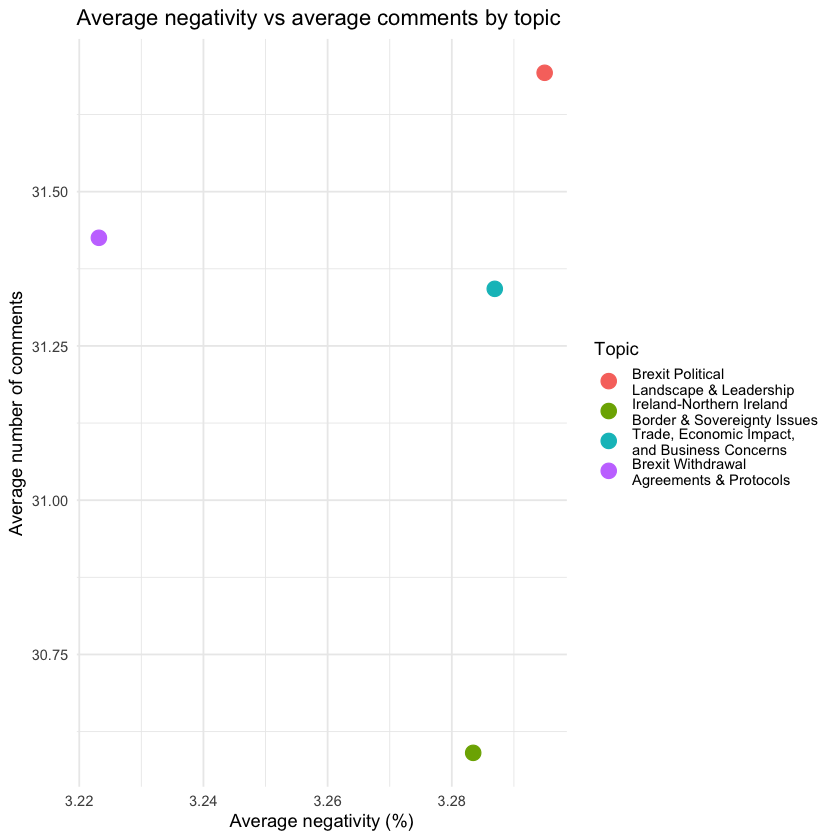

In [80]:
# Calculate averages per topic
topic_summary <- articles %>%
  group_by(assigned_topic) %>%
  summarise(
    avg_negativity = mean(negativity_percent, na.rm = TRUE),
    avg_comments = mean(num_comments, na.rm = TRUE),
    article_count = n()
  )

# Scatterplot with color by topic and legend, no text labels on points
ggplot(topic_summary, aes(x = avg_negativity, y = avg_comments, color = assigned_topic)) +
  geom_point(size = 4) +
  labs(
    title = "Average negativity vs average comments by topic",
    x = "Average negativity (%)",
    y = "Average number of comments",
    color = "Topic"
  ) +
  theme_minimal()


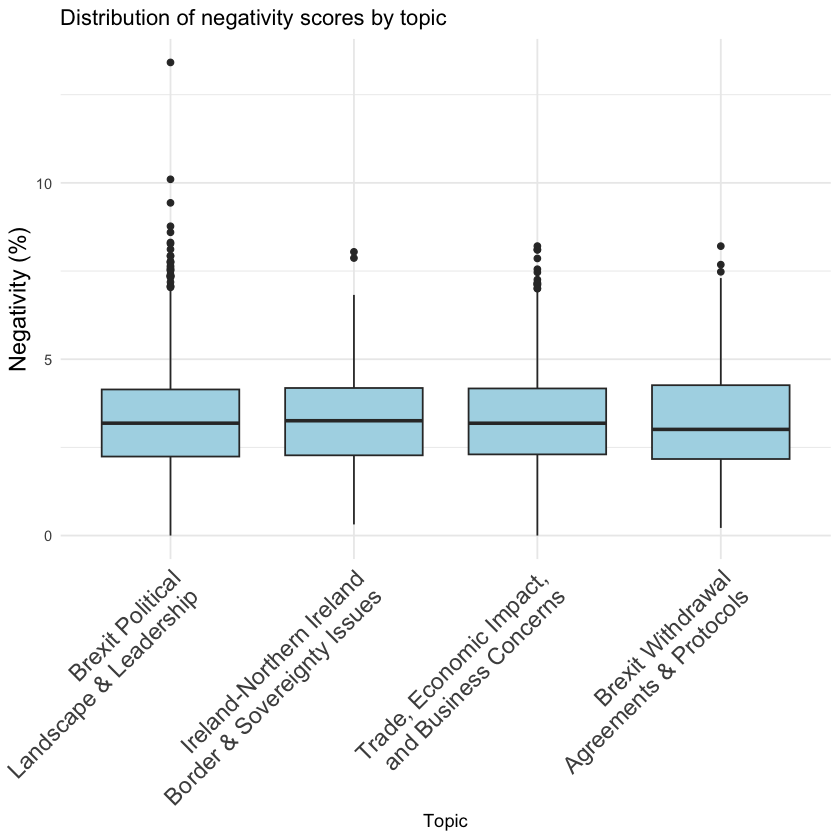

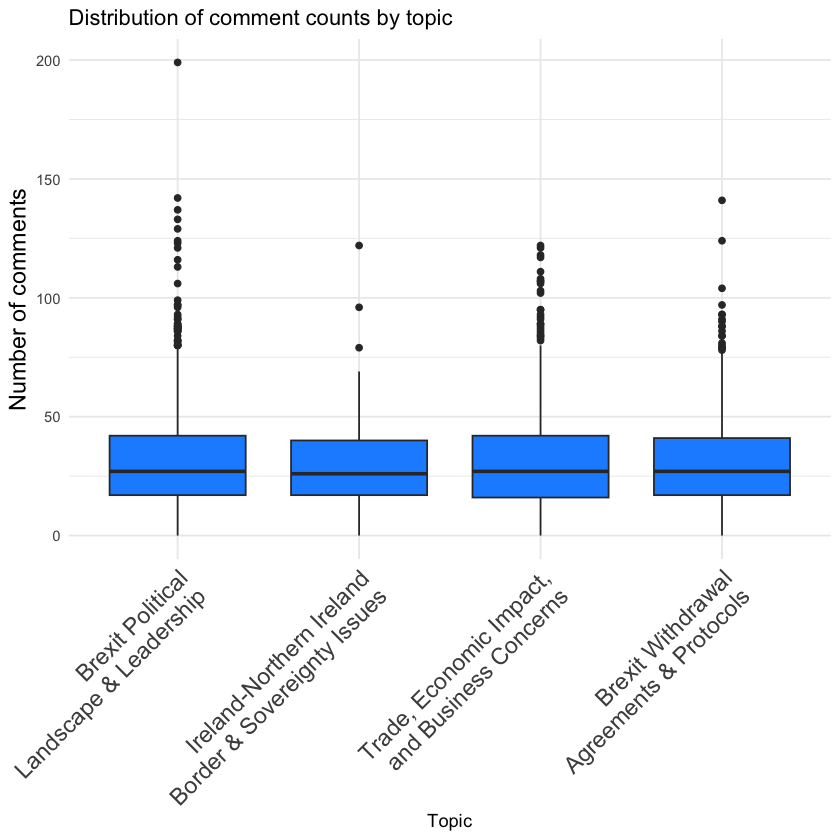

In [79]:

articles <- articles %>%
  mutate(assigned_topic = factor(assigned_topic,
    levels = unique(assigned_topic),
    labels = c(
      "Brexit Political\nLandscape & Leadership",
      "Ireland-Northern Ireland\nBorder & Sovereignty Issues",
      "Trade, Economic Impact,\nand Business Concerns",
      "Brexit Withdrawal\nAgreements & Protocols"
    )
  ))

# Negativity boxplot with bigger, multiline x labels and larger y-axis label
ggplot(articles, aes(x = assigned_topic, y = negativity_percent)) +
  geom_boxplot(fill = "lightblue") +
  labs(
    title = "Distribution of negativity scores by topic",
    x = "Topic",
    y = "Negativity (%)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    axis.title.y = element_text(size = 14)
  )

# Comments boxplot with bigger, multiline x labels and larger y-axis label
ggplot(articles, aes(x = assigned_topic, y = num_comments)) +
  geom_boxplot(fill = "dodgerblue") +
  labs(
    title = "Distribution of comment counts by topic",
    x = "Topic",
    y = "Number of comments"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    axis.title.y = element_text(size = 14)
  )


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


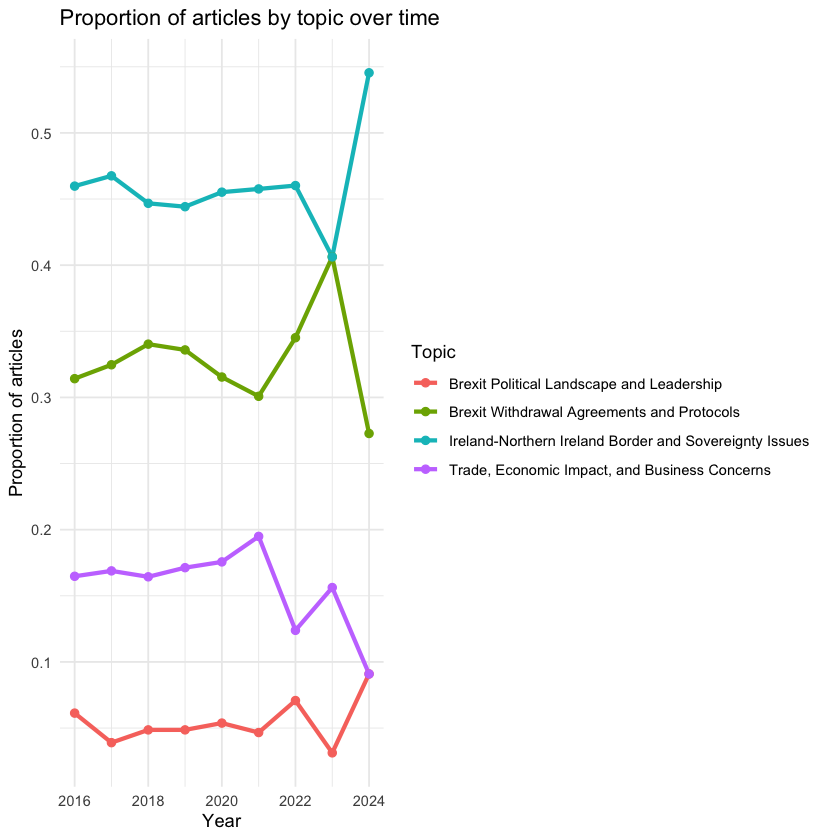

In [76]:
# Calculate total articles per year
year_totals <- articles %>%
  group_by(year) %>%
  summarise(total_articles = n())

# Join totals back and calculate proportion per topic per year
topic_time_std <- articles %>%
  group_by(year, assigned_topic) %>%
  summarise(count = n()) %>%
  left_join(year_totals, by = "year") %>%
  mutate(proportion = count / total_articles) %>%
  ungroup()

ggplot(topic_time_std, aes(x = year, y = proportion, color = assigned_topic)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "Proportion of articles by topic over time",
    x = "Year",
    y = "Proportion of articles",
    color = "Topic"
  ) +
  theme_minimal()



In [47]:
write.csv(articles, "articles_with_LDA.csv", row.names = FALSE)
